# Segmenting and Clustering Neighborhoods in Toronto - Part-3

#### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from sklearn.cluster import KMeans # import k-means from clustering stage

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
df=pd.read_csv('Toronto_2.csv')

In [3]:
df.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.81139,-79.19662
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.78574,-79.15875
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.76575,-79.17470
3,M1G,Scarborough,Woburn,43.76812,-79.21761
4,M1H,Scarborough,Cedarbrae,43.76944,-79.23892


In [4]:
len(df['Borough'].unique())

10

In [5]:
len(df['Neighborhood'])

103

#### How many unique Boroughs in the city of Torornto?

The dataframe has 10 boroughs and 103 neighborhoods.

#### Use geopy library to get the latitude and longitude values of Toronto City

In [6]:
loc='Toronto'
geolocator=Nominatim(user_agent="tor_agent")
location_cor=geolocator.geocode(loc)
latitude=location_cor.latitude
longitude=location_cor.longitude
print('Toronto co-ordinates are {},{}'.format(latitude,longitude))

Toronto co-ordinates are 43.6534817,-79.3839347


Map to visualize the Toronto Neighborhoods

In [7]:
# create map of Toronto using latitude and longitude values
map_TO = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_TO)  
    
map_TO


Boroughs that contain the word Toronto and explore the dataframe

In [8]:
toronto_data = df[df['Borough'].str.contains("Toronto")].reset_index(drop=True)
toronto_city = toronto_data.reset_index(drop=True)
toronto_city

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.67709,-79.29547
1,M4K,East Toronto,"The Danforth West, Riverdale",43.68375,-79.35512
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.66797,-79.31467
3,M4M,East Toronto,Studio District,43.66213,-79.33497
4,M4N,Central Toronto,Lawrence Park,43.72843,-79.38713
5,M4P,Central Toronto,Davisville North,43.71276,-79.38851
6,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.71458,-79.40668
7,M4S,Central Toronto,Davisville,43.70340,-79.38659
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.69048,-79.38318
9,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.68568,-79.40237


In [9]:
toronto_city.shape

(39, 5)

In [10]:
# create map of Toronto using latitude and longitude values
map_torontocity = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_city['Latitude'], toronto_city['Longitude'], toronto_city['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_torontocity)  
    
map_torontocity


Define Foursquare Credentials and Version

In [11]:
CLIENT_ID = 'KUX5HFXRMLY2DVQWUUIZZ2IEBV00POY3TEPQTGFJNVSDEJN3' # your Foursquare ID
CLIENT_SECRET = 'PL0QHQ0JNCOPP5BOUH1O0WN4RWWFLRHG1F4ROQTDX2QH5IGQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KUX5HFXRMLY2DVQWUUIZZ2IEBV00POY3TEPQTGFJNVSDEJN3
CLIENT_SECRET:PL0QHQ0JNCOPP5BOUH1O0WN4RWWFLRHG1F4ROQTDX2QH5IGQ


### Explore Neighborhoods in Toronto

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
toronto_venues=getNearbyVenues(toronto_city['Neighborhood'], toronto_city['Latitude'], toronto_city['Longitude'])

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West,  Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High

Let's check the size of the resulting dataframe

In [14]:
print(toronto_venues.shape)
toronto_venues.head()

(1701, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.67709,-79.29547,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.67709,-79.29547,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.67709,-79.29547,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.67709,-79.29547,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.68375,-79.35512,Centennial College - Story Arts Centre,43.684874,-79.349140,Business Service


Let's check how many venues were returned for each neighborhood

In [15]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,64,64,64,64,64,64
"Brockton, Parkdale Village, Exhibition Place",84,84,84,84,84,84
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",100,100,100,100,100,100
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",77,77,77,77,77,77
Central Bay Street,60,60,60,60,60,60
Christie,11,11,11,11,11,11
Church and Wellesley,82,82,82,82,82,82
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,27,27,27,27,27,27


# Analyze Each Neighborhood

In [16]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
toronto_onehot.shape

(1701, 224)

In [18]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

In [19]:
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint
0,Berczy Park,0.015625,0.000000,0.000000,0.015625,0.00,0.015625,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.011905,0.011905,0.000000,0.000000,0.00,0.000000,0.000000,0.023810,0.000000,...,0.011905,0.000000,0.000000,0.000000,0.011905,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Business reply mail Processing Centre, South C...",0.000000,0.000000,0.020000,0.000000,0.00,0.010000,0.000000,0.000000,0.030000,...,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.010000,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.012987,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.012987,...,0.000000,0.000000,0.000000,0.012987,0.000000,0.012987,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.00,0.016667,0.016667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.016667,0.016667,0.000000
5,Christie,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Church and Wellesley,0.012195,0.000000,0.012195,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.030000,0.000000,0.00,0.010000,0.000000,0.000000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000
8,Davisville,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Davisville North,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
toronto_grouped.shape

(39, 224)

In [21]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.08
1        Cocktail Bar  0.05
2  Seafood Restaurant  0.05
3      Breakfast Spot  0.03
4         Cheese Shop  0.03


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0     Coffee Shop  0.06
1            Café  0.06
2             Bar  0.06
3      Restaurant  0.05
4  Sandwich Place  0.04


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
              venue  freq
0       Coffee Shop  0.07
1              Café  0.05
2             Hotel  0.05
3  Asian Restaurant  0.03
4  Sushi Restaurant  0.03


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                venue  freq
0         Coffee Shop  0.06
1  Italian Restaurant  0.06
2                Café  0.06
3                Park  0.04
4   French Restaurant  0.04


----Central Bay Street----
                       venue  freq
0            

#### Put that top 5 values in a dataframe

Write a fuction to sort venues in descending order

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [23]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Bakery,Cheese Shop,Beer Bar,Breakfast Spot,Restaurant,Farmers Market,Café
1,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Bar,Restaurant,Gift Shop,Sandwich Place,Furniture / Home Store,Nightclub,Japanese Restaurant,French Restaurant
2,"Business reply mail Processing Centre, South C...",Coffee Shop,Hotel,Café,Gym,Sushi Restaurant,Asian Restaurant,Seafood Restaurant,Steakhouse,Sandwich Place,Salon / Barbershop
3,"CN Tower, King and Spadina, Railway Lands, Har...",Coffee Shop,Café,Italian Restaurant,French Restaurant,Gym / Fitness Center,Bar,Park,Sandwich Place,Grocery Store,Speakeasy
4,Central Bay Street,Coffee Shop,Clothing Store,Sandwich Place,Bubble Tea Shop,Restaurant,Café,Plaza,Pizza Place,Cosmetics Shop,Middle Eastern Restaurant
5,Christie,Café,Grocery Store,Italian Restaurant,Baby Store,Coffee Shop,Playground,Candy Store,Athletics & Sports,Dumpling Restaurant,Eastern European Restaurant
6,Church and Wellesley,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Fast Food Restaurant,Café,Gay Bar,Hotel,Men's Store,Mediterranean Restaurant
7,"Commerce Court, Victoria Hotel",Coffee Shop,Restaurant,Hotel,Café,Italian Restaurant,Gym,Japanese Restaurant,Seafood Restaurant,American Restaurant,Deli / Bodega
8,Davisville,Dessert Shop,Pizza Place,Sandwich Place,Café,Italian Restaurant,Coffee Shop,Farmers Market,Fast Food Restaurant,Restaurant,Chinese Restaurant
9,Davisville North,Breakfast Spot,Hotel,Park,Department Store,Food & Drink Shop,Gym / Fitness Center,Gift Shop,Distribution Center,Falafel Restaurant,Event Space


# Clustering of Neighborhoods

####  In order to identify the optimal number of clusters, we need to use the Elbow Method! When the slope of the tangent line starts to be almost horizontal, that is the optimal number of cluster!

In [24]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

distortions = []

K = range(1,20)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=0, n_init = 50, max_iter = 500)
    kmean.fit(toronto_grouped_clustering)
    distortions.append(kmean.inertia_)

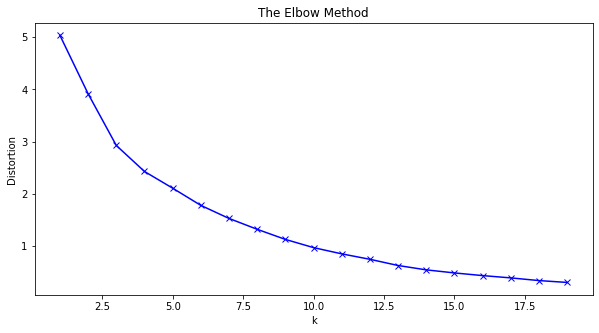

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

The elbow method seems to suggest 7 or 8 clusters

In [26]:
kclusters = 7

#run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 5])

In [27]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_city

# merge toronto_grouped with toronto_city1 to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.67709,-79.29547,5,Health Food Store,Trail,Pub,Wings Joint,Dog Run,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant
1,M4K,East Toronto,"The Danforth West, Riverdale",43.68375,-79.35512,0,Ice Cream Shop,Grocery Store,Park,Bus Line,Business Service,Discount Store,Coffee Shop,Wings Joint,Eastern European Restaurant,Electronics Store
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.66797,-79.31467,0,Park,Fast Food Restaurant,Sushi Restaurant,Ice Cream Shop,Liquor Store,Burrito Place,Light Rail Station,Restaurant,Dry Cleaner,Fish & Chips Shop
3,M4M,East Toronto,Studio District,43.66213,-79.33497,0,Brewery,Pizza Place,Bakery,Diner,Italian Restaurant,Coffee Shop,American Restaurant,Sushi Restaurant,Bar,Gastropub
4,M4N,Central Toronto,Lawrence Park,43.72843,-79.38713,1,Bus Line,Swim School,Wings Joint,Dry Cleaner,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant
5,M4P,Central Toronto,Davisville North,43.71276,-79.38851,5,Breakfast Spot,Hotel,Park,Department Store,Food & Drink Shop,Gym / Fitness Center,Gift Shop,Distribution Center,Falafel Restaurant,Event Space
6,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.71458,-79.40668,6,Gym Pool,Playground,Park,Dog Run,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant,Elementary School
7,M4S,Central Toronto,Davisville,43.70340,-79.38659,0,Dessert Shop,Pizza Place,Sandwich Place,Café,Italian Restaurant,Coffee Shop,Farmers Market,Fast Food Restaurant,Restaurant,Chinese Restaurant
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.69048,-79.38318,2,Gym,Lawyer,Trail,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant
9,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.68568,-79.40237,0,Light Rail Station,Coffee Shop,Liquor Store,Supermarket,Dry Cleaner,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space


# Examine Clusters

In [28]:
# Cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,East Toronto,0,Ice Cream Shop,Grocery Store,Park,Bus Line,Business Service,Discount Store,Coffee Shop,Wings Joint,Eastern European Restaurant,Electronics Store
2,East Toronto,0,Park,Fast Food Restaurant,Sushi Restaurant,Ice Cream Shop,Liquor Store,Burrito Place,Light Rail Station,Restaurant,Dry Cleaner,Fish & Chips Shop
3,East Toronto,0,Brewery,Pizza Place,Bakery,Diner,Italian Restaurant,Coffee Shop,American Restaurant,Sushi Restaurant,Bar,Gastropub
7,Central Toronto,0,Dessert Shop,Pizza Place,Sandwich Place,Café,Italian Restaurant,Coffee Shop,Farmers Market,Fast Food Restaurant,Restaurant,Chinese Restaurant
9,Central Toronto,0,Light Rail Station,Coffee Shop,Liquor Store,Supermarket,Dry Cleaner,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space
11,Downtown Toronto,0,Coffee Shop,Pizza Place,Park,Chinese Restaurant,Café,Pub,Italian Restaurant,Bakery,Restaurant,Furniture / Home Store
12,Downtown Toronto,0,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Fast Food Restaurant,Café,Gay Bar,Hotel,Men's Store,Mediterranean Restaurant
13,Downtown Toronto,0,Coffee Shop,Breakfast Spot,Yoga Studio,Thai Restaurant,Event Space,Electronics Store,Restaurant,Spa,Food Truck,Italian Restaurant
14,Downtown Toronto,0,Coffee Shop,Clothing Store,Hotel,Japanese Restaurant,Café,Middle Eastern Restaurant,Cosmetics Shop,Furniture / Home Store,Tanning Salon,Italian Restaurant
15,Downtown Toronto,0,Coffee Shop,Cosmetics Shop,Café,Italian Restaurant,Clothing Store,Cocktail Bar,Hotel,Gastropub,Seafood Restaurant,American Restaurant


In [29]:
# Cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Central Toronto,1,Bus Line,Swim School,Wings Joint,Dry Cleaner,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant


In [30]:
# Cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Central Toronto,2,Gym,Lawyer,Trail,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant


In [31]:
# Cluster 4
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Central Toronto,3,Park,Wings Joint,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant,Elementary School


In [32]:
# Cluster 5
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Central Toronto,4,Home Service,Wings Joint,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant,Elementary School


In [33]:
# Cluster 6
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Toronto,5,Health Food Store,Trail,Pub,Wings Joint,Dog Run,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant
5,Central Toronto,5,Breakfast Spot,Hotel,Park,Department Store,Food & Drink Shop,Gym / Fitness Center,Gift Shop,Distribution Center,Falafel Restaurant,Event Space
34,West Toronto,5,Convenience Store,Park,Pub,Residential Building (Apartment / Condo),Dog Run,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant


In [34]:
# Cluster 7
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Central Toronto,6,Gym Pool,Playground,Park,Dog Run,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant,Elementary School
10,Downtown Toronto,6,Park,Playground,Bike Trail,Wings Joint,Donut Shop,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant
